# Building a Multi-layer Neural Network

We  use NeuroLab to build a multi-layer neural network.
Out task is to predict a mathematical function y = 3x^2 + 5
The training data is generated using this function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Generate the training data
min_val = -15
max_val = 15
num_points = 150
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)



In [2]:
# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)
labels

array([[0.17930093],
       [0.17455495],
       [0.16987309],
       [0.16525538],
       [0.16070179],
       [0.15621235],
       [0.15178703],
       [0.14742586],
       [0.14312881],
       [0.13889591],
       [0.13472713],
       [0.1306225 ],
       [0.12658199],
       [0.12260563],
       [0.11869339],
       [0.11484529],
       [0.11106133],
       [0.1073415 ],
       [0.10368581],
       [0.10009425],
       [0.09656683],
       [0.09310354],
       [0.08970439],
       [0.08636937],
       [0.08309849],
       [0.07989174],
       [0.07674913],
       [0.07367065],
       [0.0706563 ],
       [0.06770609],
       [0.06482002],
       [0.06199808],
       [0.05924028],
       [0.05654661],
       [0.05391708],
       [0.05135168],
       [0.04885042],
       [0.04641329],
       [0.04404029],
       [0.04173143],
       [0.03948671],
       [0.03730612],
       [0.03518967],
       [0.03313735],
       [0.03114916],
       [0.02922512],
       [0.0273652 ],
       [0.025

In [3]:
data.shape

(150, 1)

In [4]:
data

array([[-15.        ],
       [-14.79865772],
       [-14.59731544],
       [-14.39597315],
       [-14.19463087],
       [-13.99328859],
       [-13.79194631],
       [-13.59060403],
       [-13.38926174],
       [-13.18791946],
       [-12.98657718],
       [-12.7852349 ],
       [-12.58389262],
       [-12.38255034],
       [-12.18120805],
       [-11.97986577],
       [-11.77852349],
       [-11.57718121],
       [-11.37583893],
       [-11.17449664],
       [-10.97315436],
       [-10.77181208],
       [-10.5704698 ],
       [-10.36912752],
       [-10.16778523],
       [ -9.96644295],
       [ -9.76510067],
       [ -9.56375839],
       [ -9.36241611],
       [ -9.16107383],
       [ -8.95973154],
       [ -8.75838926],
       [ -8.55704698],
       [ -8.3557047 ],
       [ -8.15436242],
       [ -7.95302013],
       [ -7.75167785],
       [ -7.55033557],
       [ -7.34899329],
       [ -7.14765101],
       [ -6.94630872],
       [ -6.74496644],
       [ -6.54362416],
       [ -6

Text(0.5, 1.0, 'Input data')

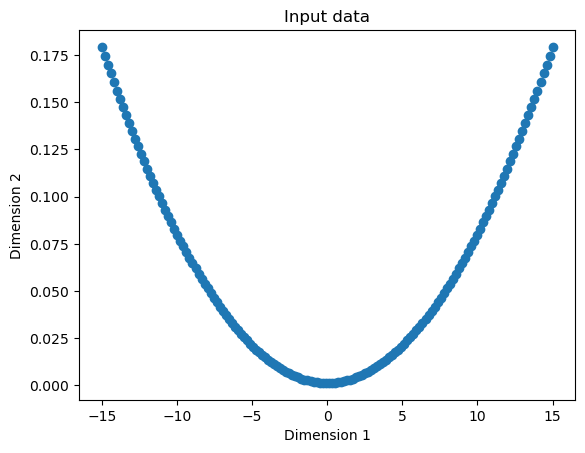

In [5]:
# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

Epoch: 100; Error: 0.43363557950431963;
Epoch: 200; Error: 0.04538389325334605;
Epoch: 300; Error: 0.19918410767792555;
Epoch: 400; Error: 0.09495084574112972;
Epoch: 500; Error: 0.12034125860820298;
Epoch: 600; Error: 0.0959089077040439;
Epoch: 700; Error: 0.09704636762468122;
Epoch: 800; Error: 0.085063237748916;
Epoch: 900; Error: 0.08224927273568461;
Epoch: 1000; Error: 0.15962921658223184;
Epoch: 1100; Error: 0.129936331572796;
Epoch: 1200; Error: 0.025423293607710826;
Epoch: 1300; Error: 0.030329626978856446;
Epoch: 1400; Error: 0.027268047038859676;
Epoch: 1500; Error: 0.020544656587352435;
Epoch: 1600; Error: 0.014349037961353079;
Epoch: 1700; Error: 0.01640585748334095;
Epoch: 1800; Error: 0.012349994733853134;
Epoch: 1900; Error: 0.023337830978625903;
Epoch: 2000; Error: 0.01995610230064431;
The maximum number of train epochs is reached


Text(0.5, 1.0, 'Training error progress')

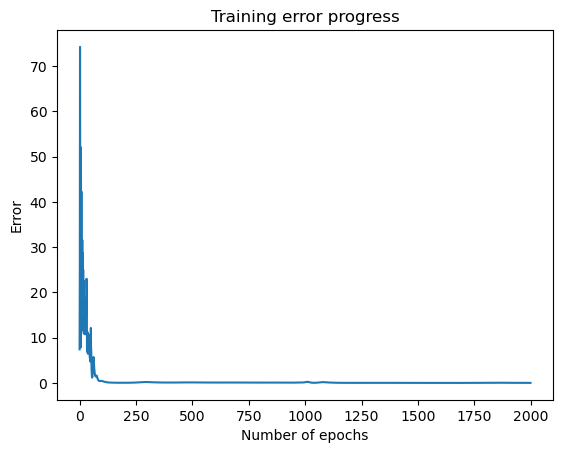

In [6]:
# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')


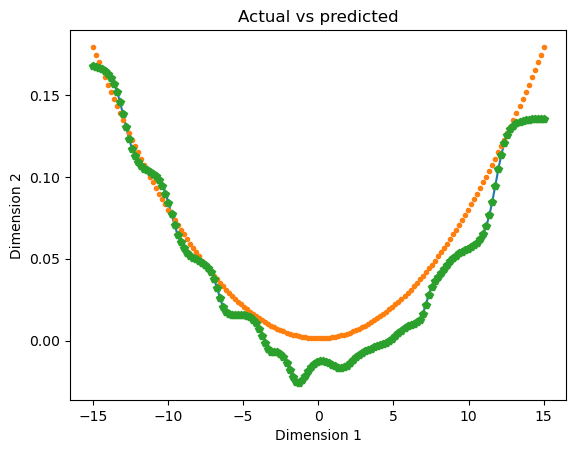

In [7]:
# Plot the output 
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Actual vs predicted')

plt.show()

The predicted output appears close to the actual value. 
If we continue to train the network and reduce the error, better prediction may be possible.